In [7]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [11]:
import sqlite3
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import logging

# Set up logging
logging.basicConfig(level=logging.DEBUG)

# Function to scrape Amazon
def scrape_amazon():
    amazon_data = []
    try:
        service = Service(executable_path='C:/chromedriver-win64/chromedriver-win64/chromedriver.exe')
        driver = webdriver.Chrome(service=service)
        driver.get('https://www.amazon.in/s?k=laptops')
        time.sleep(5)
        sections = driver.find_elements(By.CLASS_NAME, 'a-section')
        for section in sections:
            try:
                title = section.find_element(By.CLASS_NAME, 'a-size-medium').text
                try:
                    price = section.find_element(By.CLASS_NAME, 'a-price-whole').text
                except:
                    price = 'Not available'
                amazon_data.append((title, price))
            except:
                continue
    except Exception as e:
        logging.error("An error occurred", exc_info=True)
    finally:
        driver.quit()
    return amazon_data

# Function to scrape Flipkart
def scrape_flipkart():
    flipkart_data = []
    service = Service(executable_path="C:/chromedriver-win64/chromedriver-win64/chromedriver.exe")
    driver = webdriver.Chrome(service=service)
    try:
        driver.get("https://www.flipkart.com/search?q=laptops")
        time.sleep(5)
        try:
            close_button = driver.find_element(By.XPATH, '//button[contains(text(),"✕")]')
            close_button.click()
        except Exception as e:
            print("No pop-up appeared:", e)
        time.sleep(5)
        sections = driver.find_elements(By.CLASS_NAME, 'yKfJKb.row')
        for section in sections:
            try:
                name = section.find_element(By.CLASS_NAME, 'KzDlHZ').text
                price = section.find_element(By.CLASS_NAME, 'Nx9bqj._4b5DiR').text
                flipkart_data.append((name, price))
            except Exception as e:
                print("An error occurred while extracting data from a section:", e)
    finally:
        driver.quit()
    return flipkart_data

# Main execution
amazon_data = scrape_amazon()
flipkart_data = scrape_flipkart()

DEBUG:selenium.webdriver.common.driver_finder:Skipping Selenium Manager; path to chrome driver specified in Service class: C:/chromedriver-win64/chromedriver-win64/chromedriver.exe
DEBUG:selenium.webdriver.common.service:Started executable: `C:/chromedriver-win64/chromedriver-win64/chromedriver.exe` in a child process with pid: 5936 using 0 to output -3
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session {'capabilities': {'firstMatch': [{}], 'alwaysMatch': {'browserName': 'chrome', 'pageLoadStrategy': <PageLoadStrategy.normal: 'normal'>, 'goog:chromeOptions': {'extensions': [], 'args': []}}}}
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): localhost:51810
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session HTTP/1.1" 200 882
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"capabilities":{"acceptInsecureCerts":false,"browserName":"chrome","browserVersion":"126.0.6478.127","chrom

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.270/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.270/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.274/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.274/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.765"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.765/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.765/text HTTP/1.1" 200 37
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"Power. It’s in the Air."} | headers=HTTPHeaderDict({'Content-Length': '37', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.277/element {'using': 'css selector', 'value': '.a-price-whole'}
DE

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.280/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No symbol) [0x00007FF68F5C853C]\n\t(No symbol) [0x00007FF68F5BBBAC]\n\t(No symbol) [0x00007FF68F5ED06F]\n\t(No symbol) [0x00007FF68F5BBA76]\n\t(No symbol) [0x00007FF68F5ED240]\n\t(No symbol) [0x00007FF68F60C977]\n\t(No symbol) [0x00007FF68F5ECDD3]\n\t(No symbol) [0x00007FF68F5BA33B]\n\t(No symbol) [0x00007FF68F5BAED1]\n\tGetHandleVerif

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.285/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.285/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.290/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.290/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.295/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.295/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.766"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.766/text HTTP/1.1" 200 186
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"Apple 2023 MacBook Pro laptop M2 Max chip with 12‑core CPU and 38‑core GPU: 33.74 cm (16.2-inch), 32GB Unified Memory, 1TB SSD storage. Works with iPhone/iPad; Space Grey"} | headers=HTTPHeaderDict({'Content-Length': '186', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.298/element {'using': 'css selector', 'value': '.a-price-whole'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /sess

DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No symbol) [0x00007FF68F5C853C]\n\t(No symbol) [0x00007FF68F5BBBAC]\n\t(No symbol) [0x00007FF68F5ED06F]\n\t(No symbol) [0x00007FF68F5BBA76]\n\t(No symbol) [0x00007FF68F5ED240]\n\t(No symbol) [0x00007FF68F60C977]\n\t(No symbol) [0x00007FF68F5ECDD3]\n\t(No symbol) [0x00007FF68F5BA33B]\n\t(No symbol) [0x00007FF68F5BAED1]\n\tGetHandleVerifier [0x00007FF68FA48B1D+3217341]\n\tGetHandleVerifier [0x00007FF68FA95AE3+3532675]\n\tGetHandleVerifier [0x00007FF68FA8B0E0+3489152]\n\tGetHandleVerifier [0x00007FF68F7EE776+750614]\n\t(No symbol) [0x00007FF68F6

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.306/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.306/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.310/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.310/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.768"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.313/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.313/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.318/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.318/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.322/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.322/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.325/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.325/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.330/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.330/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.772/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.772/text HTTP/1.1" 200 206
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"ASUS Vivobook Go 14 (2023), 14\" (35.56 cm) FHD (1920 x 1080) 16:9, Intel Celeron N4500, Thin and Light Laptop (8GB RAM/256GB SSD/Integrated Graphics/Windows 11 Home/Black/1.3 Kg), E410KA-EK013W"} | headers=HTTPHeaderDict({'Content-Length': '206', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.r

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.337/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.773"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.773/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.341/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.341/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.346/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.346/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.350/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.350/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.353/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.353/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.358/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.358/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.363/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.363/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.368/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.368/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.373/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.373/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.378/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.378/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.383/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.383/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.388/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.388/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.393/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.393/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.398/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.398/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.403/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.403/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.408/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.408/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.413/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.413/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.776/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.776/text HTTP/1.1" 200 179
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"(Refurbished) Lenovo ThinkPad 8th Gen Intel Core i5 Thin & Light HD Laptop (8 GB DDR4 RAM/256 GB SSD/14\" (35.6 cm) HD/Windows 11/MS Office/WiFi/Webcam/Intel Graphics)"} | headers=HTTPHeaderDict({'Content-Length': '179', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POS

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.420/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.777"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.777/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.424/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.424/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.428/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.428/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.431/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.431/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.436/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.436/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.780/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.780/text HTTP/1.1" 200 187
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"HP Laptop 15s, AMD Ryzen 3 5300U, 15.6-inch (39.6 cm), FHD, 8GB DDR4, 512GB SSD, AMD Radeon graphics, Thin & light, Dual speakers (Win 11, MSO 2019, Silver, 1.69 kg), eq2143AU"} | headers=HTTPHeaderDict({'Content-Length': '187', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connec

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.443/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.781"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.781/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.447/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.447/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.452/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.452/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.457/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.457/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.783/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.783/text HTTP/1.1" 200 18
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"52,525"} | headers=HTTPHeaderDict({'Content-Length': '18', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.461/element {'usi

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.464/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.782"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.782/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.468/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.468/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.473/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.473/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.784/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.784/text HTTP/1.1" 200 191
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"Acer Aspire Lite AMD Ryzen 5 5500U Premium Thin and Light Laptop (16 GB RAM/512 GB SSD/Windows 11 Home) AL15-41, 39.62 cm (15.6\") Full HD Display, Metal Body, Steel Gray, 1.59 KG"} | headers=HTTPHeaderDict({'Content-Length': '191', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_co

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.480/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.785"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.785/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.484/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.484/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.489/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.489/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.493/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.493/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.496/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.496/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.501/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.501/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.788/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.788/text HTTP/1.1" 200 212
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"Acer Aspire Lite 12th Gen Intel Core i5-1235U Thin and Light Metal Laptop (Windows 11 Home/16GB RAM/512GB SSD/Intel Iris Xe Graphics/MSO) AL15-52, 39.62cm (15.6\") Full HD Display, Steel Gray, 1.59 KG"} | headers=HTTPHeaderDict({'Content-Length': '212', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdr

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.508/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.789"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.789/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.512/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.512/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.517/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.517/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.521/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.521/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.524/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.524/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.529/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.529/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.534/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.534/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.539/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.539/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.792"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.792/text HTTP/1.1" 200 207
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"Lenovo IdeaPad Slim 3 13th Gen Intel Core i7-13620H 15\" (38.1cm) FHD IPS 300 Nits Thin & Light Laptop (16GB/512GB SSD/Win 11/Office 2021/Alexa built-in/3 month Game Pass/Grey/1.62Kg), 83EM008GIN"} | headers=HTTPHeaderDict({'Content-Length': '207', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.542/element {'using': 'css selector', 'value': '.a-price-whole'}
DEBUG:urllib3.connectionpool:http://lo

DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No symbol) [0x00007FF68F5C853C]\n\t(No symbol) [0x00007FF68F5BBBAC]\n\t(No symbol) [0x00007FF68F5ED06F]\n\t(No symbol) [0x00007FF68F5BBA76]\n\t(No symbol) [0x00007FF68F5ED240]\n\t(No symbol) [0x00007FF68F60C977]\n\t(No symbol) [0x00007FF68F5ECDD3]\n\t(No symbol) [0x00007FF68F5BA33B]\n\t(No symbol) [0x00007FF68F5BAED1]\n\tGetHandleVerifier [0x00007FF68FA48B1D+3217341]\n\tGetHandleVerifier [0x00007FF68FA95AE3+3532675]\n\tGetHandleVerifier [0x00007FF68FA8B0E0+3489152]\n\tGetHandleVerifier [0x00007FF68F7EE776+750614]\n\t(No symbol) [0x00007FF68F6

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.550/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.550/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.795/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.795/text HTTP/1.1" 200 18
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"35,990"} | headers=HTTPHeaderDict({'Content-Length': '18', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.554/element {'usi

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.557/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.794"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.794/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.561/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.561/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.566/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.566/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.570/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.570/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.796"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.573/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.573/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.578/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.578/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.799/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.799/text HTTP/1.1" 200 18
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"51,990"} | headers=HTTPHeaderDict({'Content-Length': '18', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.582/element {'usi

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.585/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.798"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.798/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.589/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.589/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.594/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.594/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.598/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.598/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.800"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.601/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.601/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.606/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.606/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.611/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.611/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.615/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.615/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.802"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.618/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.618/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.623/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.623/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.805/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.805/text HTTP/1.1" 200 18
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"25,990"} | headers=HTTPHeaderDict({'Content-Length': '18', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.627/element {'usi

DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.630/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.804"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.804/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E67775

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.634/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.634/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.639/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.639/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.806"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.806/text HTTP/1.1" 200 202
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"HP Laptop 15, 13th Gen Intel Core i3-1315U, 15.6-inch (39.6 cm), FHD, 8GB DDR4, 512GB SSD, Thin & light, Intel Iris Xᵉ graphics, Dual speakers (Win 11, MSO 2021, Silver, 1.59 kg), fd0006TU"} | headers=HTTPHeaderDict({'Content-Length': '202', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.642/element {'using': 'css selector', 'value': '.a-price-whole'}
DEBUG:urllib3.connectionpool:http://localhost

DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No symbol) [0x00007FF68F5C853C]\n\t(No symbol) [0x00007FF68F5BBBAC]\n\t(No symbol) [0x00007FF68F5ED06F]\n\t(No symbol) [0x00007FF68F5BBA76]\n\t(No symbol) [0x00007FF68F5ED240]\n\t(No symbol) [0x00007FF68F60C977]\n\t(No symbol) [0x00007FF68F5ECDD3]\n\t(No symbol) [0x00007FF68F5BA33B]\n\t(No symbol) [0x00007FF68F5BAED1]\n\tGetHandleVerifier [0x00007FF68FA48B1D+3217341]\n\tGetHandleVerifier [0x00007FF68FA95AE3+3532675]\n\tGetHandleVerifier [0x00007FF68FA8B0E0+3489152]\n\tGetHandleVerifier [0x00007FF68F7EE776+750614]\n\t(No symbol) [0x00007FF68F6

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.650/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.650/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.809/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.809/text HTTP/1.1" 200 18
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"38,212"} | headers=HTTPHeaderDict({'Content-Length': '18', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.654/element {'usi

DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.808"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.808/text {}
DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.808/text HTTP/1.1" 200 177
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"HP Laptop 15s, 12th Gen Intel Core i3, 15.6-inch (39.6 cm), 8GB DDR4, 512GB S

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.661/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.661/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.666/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.666/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.670/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.670/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.675/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.675/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.810"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connecti

DEBUG:urllib3.connectionpool:http://localhost:51810 "GET /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.810/text HTTP/1.1" 200 209
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":"iClever Bluetooth Mouse MD172, Wireless Mouse Dual Mode(Bluetooth+USB), Multi-Devices Ergonomic Mouse with 5 Adjustable DPI and 7 Buttons, Rechargeable Silent Mice for Laptop/iPad/MacBook/Tablet/PC"} | headers=HTTPHeaderDict({'Content-Length': '209', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.678/element {'using': 'css selector', 'value': '.a-price-whole'}
DEBUG:urllib3.connectionpool:http://

DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No symbol) [0x00007FF68F5C853C]\n\t(No symbol) [0x00007FF68F5BBBAC]\n\t(No symbol) [0x00007FF68F5ED06F]\n\t(No symbol) [0x00007FF68F5BBA76]\n\t(No symbol) [0x00007FF68F5ED240]\n\t(No symbol) [0x00007FF68F60C977]\n\t(No symbol) [0x00007FF68F5ECDD3]\n\t(No symbol) [0x00007FF68F5BA33B]\n\t(No symbol) [0x00007FF68F5BAED1]\n\tGetHandleVerifier [0x00007FF68FA48B1D+3217341]\n\tGetHandleVerifier [0x00007FF68FA95AE3+3532675]\n\tGetHandleVerifier [0x00007FF68FA8B0E0+3489152]\n\tGetHandleVerifier [0x00007FF68F7EE776+750614]\n\t(No symbol) [0x00007FF68F6

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.686/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.686/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.691/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.691/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.696/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.696/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.701/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.701/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.706/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.706/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.711/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.711/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.716/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.716/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.721/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.721/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.726/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.726/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.731/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.731/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.736/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.736/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.741/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.741/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.746/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.746/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.751/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.751/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.756/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.756/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51810/session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.761/element {'using': 'css selector', 'value': '.a-size-medium'}
DEBUG:urllib3.connectionpool:http://localhost:51810 "POST /session/fa54be0a01be0f89038e6d85bddb633c/element/f.DFFE93932DDF308FD4D22AED82BFBFDA.d.AAA2284FF8B3233788E6777529462431.e.761/element HTTP/1.1" 404 1127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=404 | data={"value":{"error":"no such element","message":"no such element: Unable to locate element: {\"method\":\"css selector\",\"selector\":\".a-size-medium\"}\n  (Session info: chrome=126.0.6478.127)","stacktrace":"\tGetHandleVerifier [0x00007FF68F73EEA2+31554]\n\t(No symbol) [0x00007FF68F6B7ED9]\n\t(No symbol) [0x00007FF68F57872A]\n\t(No symbol) [0x00007FF68F5C8434]\n\t(No sym

DEBUG:selenium.webdriver.common.service:Started executable: `C:/chromedriver-win64/chromedriver-win64/chromedriver.exe` in a child process with pid: 5124 using 0 to output -3
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session {'capabilities': {'firstMatch': [{}], 'alwaysMatch': {'browserName': 'chrome', 'pageLoadStrategy': <PageLoadStrategy.normal: 'normal'>, 'goog:chromeOptions': {'extensions': [], 'args': []}}}}
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): localhost:51906
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session HTTP/1.1" 200 883
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"capabilities":{"acceptInsecureCerts":false,"browserName":"chrome","browserVersion":"126.0.6478.127","chrome":{"chromedriverVersion":"126.0.6478.126 (d36ace6122e0a59570e258d82441395206d60e1c-refs/branch-heads/6478@{#1591})","userDataDir":"C:\\Users\\Admin\\AppData\\Local\\Temp\\scoped_di

No pop-up appeared: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//button[contains(text(),"✕")]"}
  (Session info: chrome=126.0.6478.127); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF68F73EEA2+31554]
	(No symbol) [0x00007FF68F6B7ED9]
	(No symbol) [0x00007FF68F57872A]
	(No symbol) [0x00007FF68F5C8434]
	(No symbol) [0x00007FF68F5C853C]
	(No symbol) [0x00007FF68F60F6A7]
	(No symbol) [0x00007FF68F5ED06F]
	(No symbol) [0x00007FF68F60C977]
	(No symbol) [0x00007FF68F5ECDD3]
	(No symbol) [0x00007FF68F5BA33B]
	(No symbol) [0x00007FF68F5BAED1]
	GetHandleVerifier [0x00007FF68FA48B1D+3217341]
	GetHandleVerifier [0x00007FF68FA95AE3+3532675]
	GetHandleVerifier [0x00007FF68FA8B0E0+3489152]
	GetHandleVerifier [0x00007FF68F7EE776+750614]
	(No symbol) [0x00007FF68F6C375F]
	(No symbol) [0x00007FF68F6BEB14]
	(No symbol) [0x00007F

DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/elements {'using': 'css selector', 'value': '.yKfJKb.row'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/elements HTTP/1.1" 200 2843
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":[{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.173"},{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.174"},{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.175"},{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.176"},{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.177"},{"element

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.174/element {'using': 'css selector', 'value': '.Nx9bqj._4b5DiR'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.174/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.200"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connect

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.177/element {'using': 'css selector', 'value': '.KzDlHZ'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.177/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.205"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET 

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.179/element {'using': 'css selector', 'value': '.Nx9bqj._4b5DiR'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.179/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.210"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connect

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.182/element {'using': 'css selector', 'value': '.KzDlHZ'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.182/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.215"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET 

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.184/element {'using': 'css selector', 'value': '.Nx9bqj._4b5DiR'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.184/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.220"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connect

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.187/element {'using': 'css selector', 'value': '.KzDlHZ'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.187/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.225"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET 

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.189/element {'using': 'css selector', 'value': '.Nx9bqj._4b5DiR'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.189/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.230"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connect

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.192/element {'using': 'css selector', 'value': '.KzDlHZ'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.192/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.235"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:GET 

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:POST http://localhost:51906/session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.194/element {'using': 'css selector', 'value': '.Nx9bqj._4b5DiR'}
DEBUG:urllib3.connectionpool:http://localhost:51906 "POST /session/6f3dc428bc12bf769791858503af8001/element/f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.194/element HTTP/1.1" 200 127
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":{"element-6066-11e4-a52e-4f735466cecf":"f.558789A19D3A1400682D4B8DC775F70F.d.75FEB79CA890C19DD3F074FA69C5B028.e.240"}} | headers=HTTPHeaderDict({'Content-Length': '127', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connect

DEBUG:selenium.webdriver.remote.remote_connection:Finished Request
DEBUG:selenium.webdriver.remote.remote_connection:DELETE http://localhost:51906/session/6f3dc428bc12bf769791858503af8001 {}
DEBUG:urllib3.connectionpool:http://localhost:51906 "DELETE /session/6f3dc428bc12bf769791858503af8001 HTTP/1.1" 200 14
DEBUG:selenium.webdriver.remote.remote_connection:Remote response: status=200 | data={"value":null} | headers=HTTPHeaderDict({'Content-Length': '14', 'Content-Type': 'application/json; charset=utf-8', 'cache-control': 'no-cache'})
DEBUG:selenium.webdriver.remote.remote_connection:Finished Request


In [12]:
# Function to create tables in SQLite and insert data
def store_in_db(amazon_data, flipkart_data):
    conn = sqlite3.connect('laptops.db')
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS amazon
                      (id INTEGER PRIMARY KEY, name TEXT, price TEXT)''')
    cursor.execute('''CREATE TABLE IF NOT EXISTS flipkart
                      (id INTEGER PRIMARY KEY, name TEXT, price TEXT)''')

    cursor.executemany('INSERT INTO amazon (name, price) VALUES (?, ?)', amazon_data)
    cursor.executemany('INSERT INTO flipkart (name, price) VALUES (?, ?)', flipkart_data)

    conn.commit()
    conn.close()

store_in_db(amazon_data, flipkart_data)

print("Data successfully scraped and stored in SQLite database.")

Data successfully scraped and stored in SQLite database.


In [16]:
def format_price(price_str):
    # Check if the price_str is 'Not available' or any other non-numeric value
    if price_str in ['Not available', '', None]:
        return None
    try:
        # Remove currency symbols and commas, then convert to float
        return float(price_str.replace('₹', '').replace('$', '').replace(',', '').strip())
    except ValueError:
        return None

In [17]:
def compare_prices(amazon_data, flipkart_data):
    amazon_products = [{'name': row[1], 'price': format_price(row[2])} for row in amazon_data]  # Assuming columns: id, name, price
    flipkart_products = [{'name': row[1], 'price': format_price(row[2])} for row in flipkart_data]  # Assuming columns: id, name, price
    
    similar_products = {}
    
    for amazon_product in amazon_products:
        for flipkart_product in flipkart_products:
            if amazon_product['name'] == flipkart_product['name']:
                if amazon_product['price'] is not None and flipkart_product['price'] is not None:
                    similar_products[amazon_product['name']] = {
                        'Amazon Price': amazon_product['price'],
                        'Flipkart Price': flipkart_product['price']
                    }
                break
                
    return similar_products

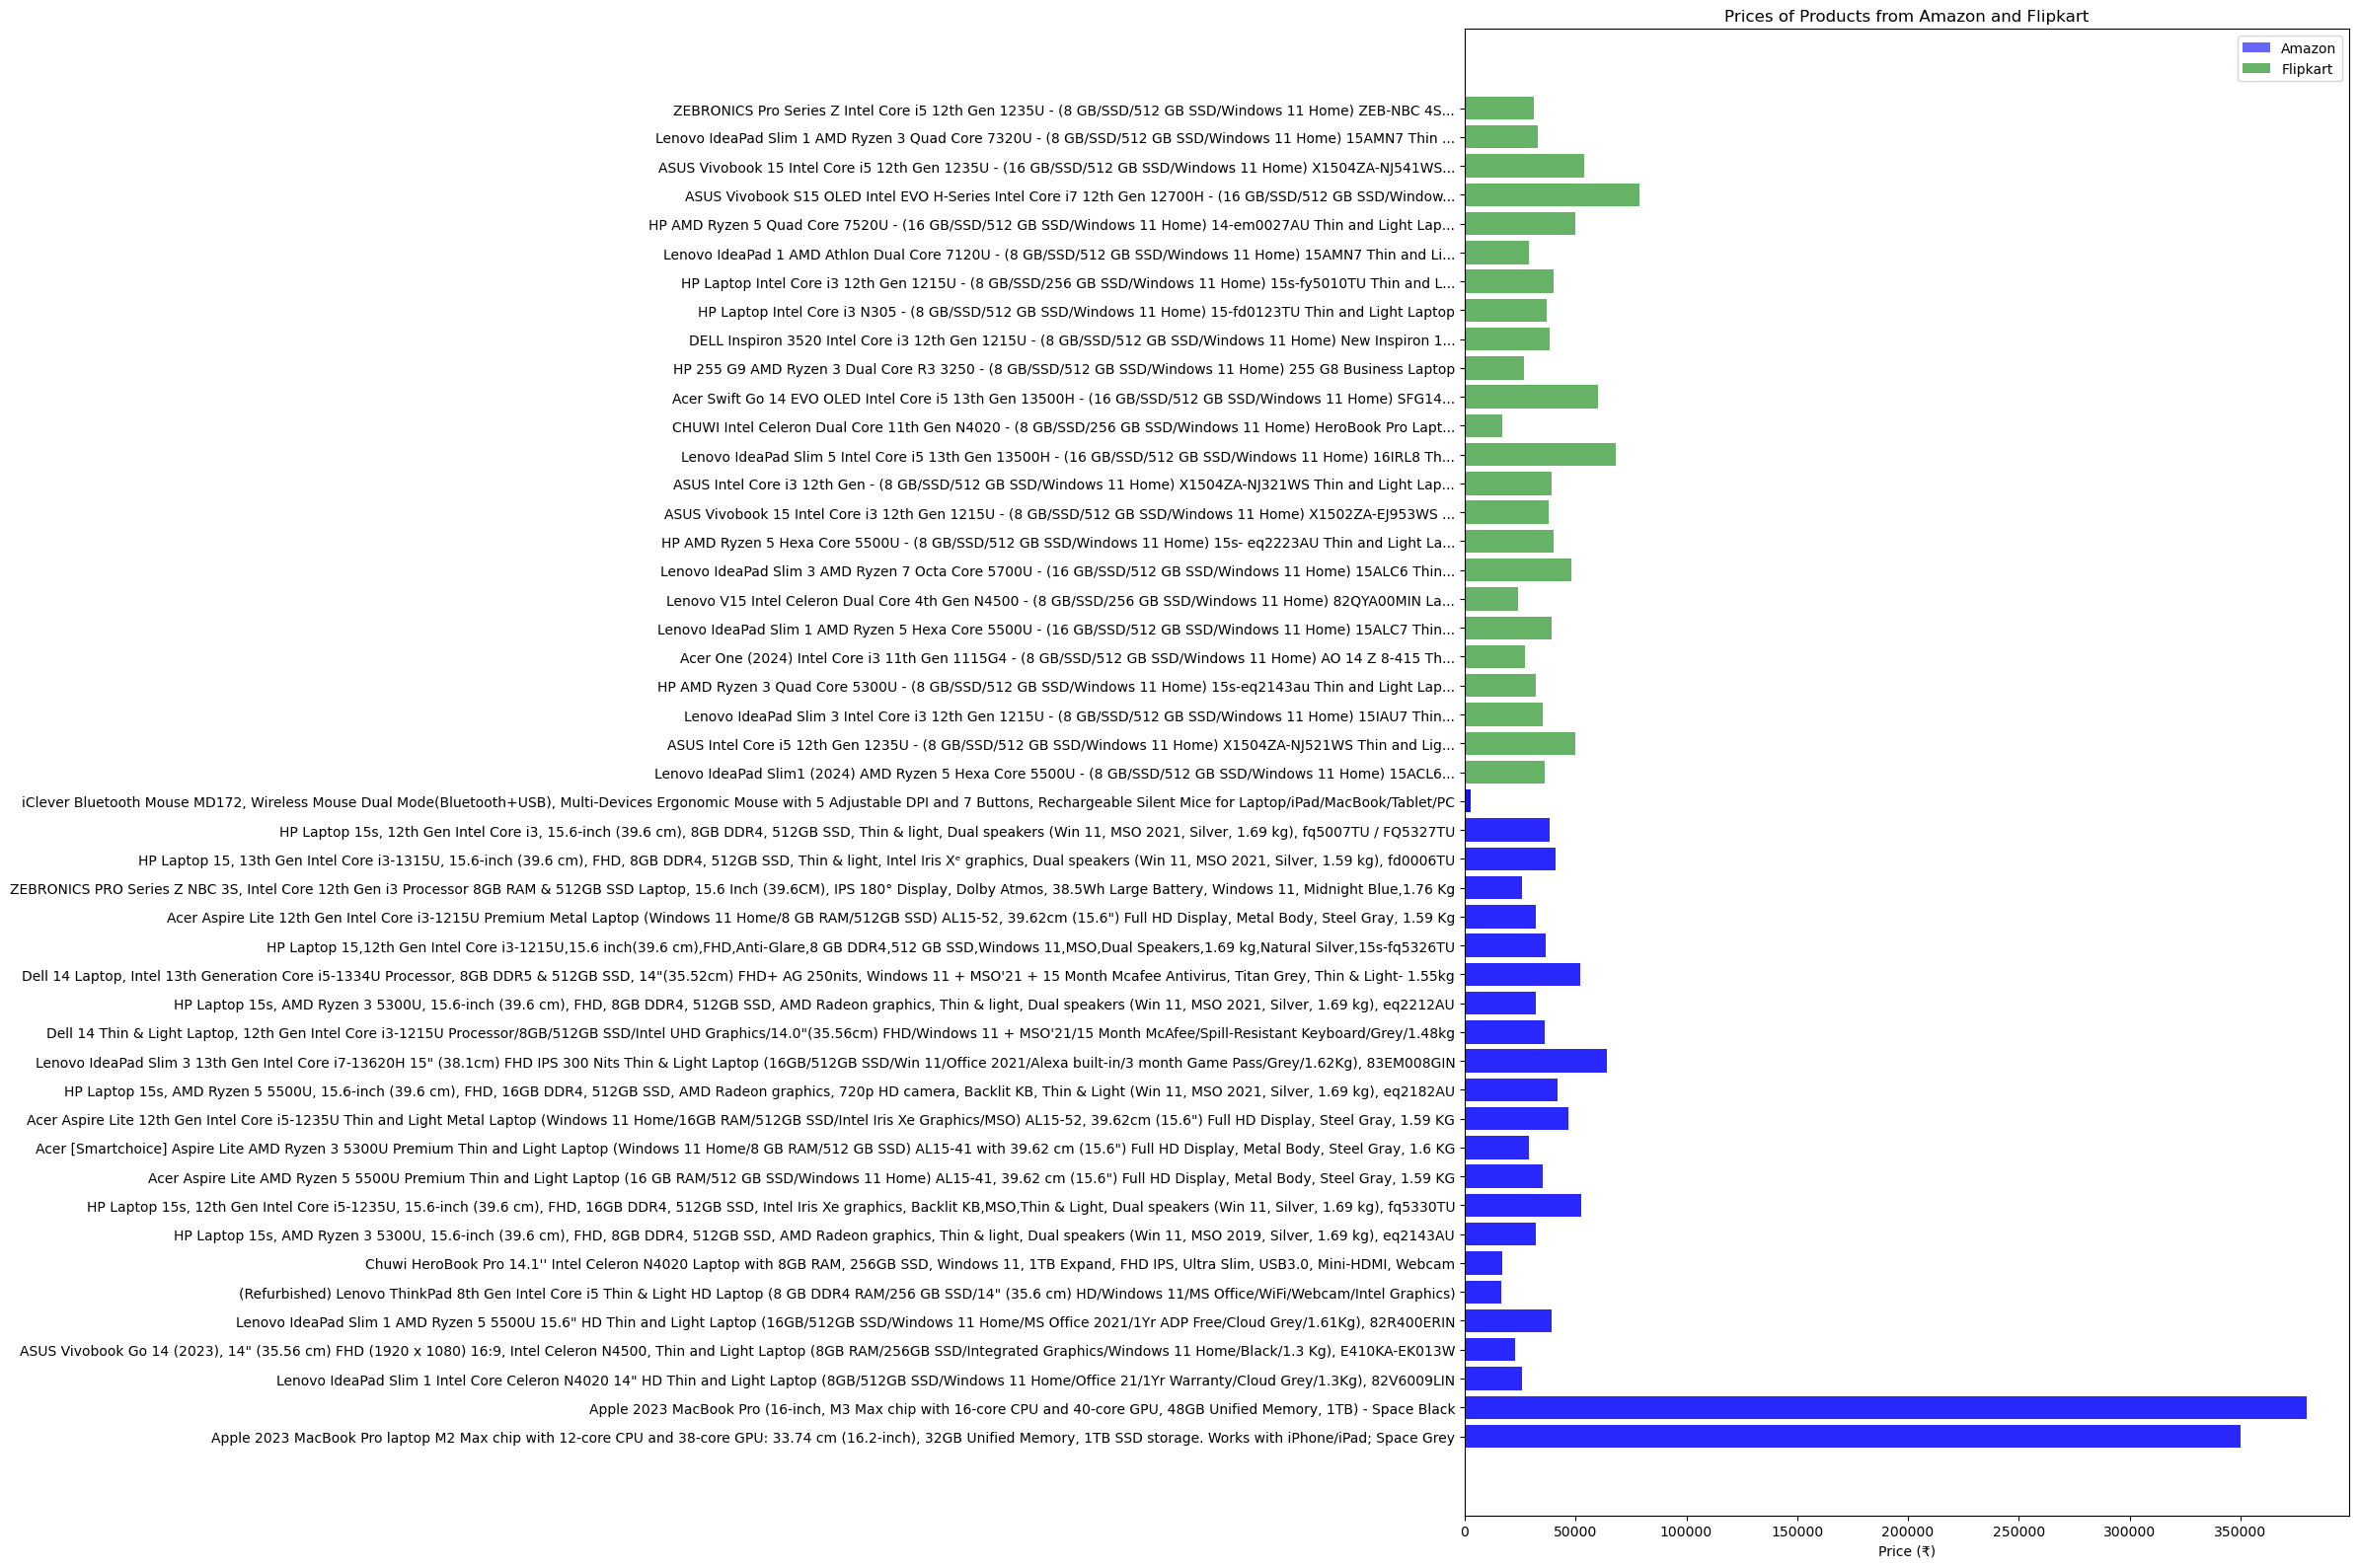

In [20]:
import matplotlib.pyplot as plt

def plot_prices(amazon_data, flipkart_data):
    # Extract product names and prices
    amazon_products = [{'name': row[1], 'price': format_price(row[2])} for row in amazon_data]  # Assuming columns: id, name, price
    flipkart_products = [{'name': row[1], 'price': format_price(row[2])} for row in flipkart_data]  # Assuming columns: id, name, price
    
    # Create lists for plotting
    amazon_products_list = [product['name'] for product in amazon_products if product['price'] is not None]
    amazon_prices_list = [product['price'] for product in amazon_products if product['price'] is not None]
    
    flipkart_products_list = [product['name'] for product in flipkart_products if product['price'] is not None]
    flipkart_prices_list = [product['price'] for product in flipkart_products if product['price'] is not None]

    # Plotting
    plt.figure(figsize=(24, 16))

    # Plot Amazon prices
    plt.barh(amazon_products_list, amazon_prices_list, color='b', alpha=0.6, label='Amazon')

    # Plot Flipkart prices
    plt.barh(flipkart_products_list, flipkart_prices_list, color='g', alpha=0.6, label='Flipkart')

    plt.xlabel('Price (₹)')
    plt.title('Prices of Products from Amazon and Flipkart')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
amazon_data, flipkart_data = fetch_data_from_db()
plot_prices(amazon_data, flipkart_data)